# Formula

Given
$$ r(t) = \Big(t, \frac{\kappa}{2}t^2, \frac{\kappa\tau}{6}t^3\Big),$$

In [1]:
import sympy as sym
from sympy import symbols
from sympy.vector import CoordSys3D

In [2]:
t, v = symbols('t tau', real=True)
k = symbols('kappa', positive=True)
x = t
y = k/2 * t**2
z = k*v/6 * t**3

In [3]:
N = CoordSys3D('N')
r = x*N.i + y*N.j + z*N.k
r

t*N.i + kappa*t**2/2*N.j + kappa*t**3*tau/6*N.k

In [4]:
r1 = sym.diff(r, t)
r2 = sym.diff(r, t, 2)
r3 = sym.diff(r, t, 3)

In [5]:
r1.simplify()

N.i + kappa*t*N.j + kappa*t**2*tau/2*N.k

Could calculate Frenet frames
$$\alpha(t) = \frac{r'}{\|r'\|},\quad
\beta(t) = \gamma\times\alpha,\quad
\gamma(t) = \frac{r'\times r''}{\|r'\times r''\|}$$
and
$$\kappa(t) = \frac{\|r'\times r''\|}{\|r'\|^3},\quad
\tau(t) = \frac{(r', r'', r''')}{\|r'\times r''\|^2},\quad$$

In [6]:
a = r1.normalize()
c = r1.cross(r2).normalize()
b = c.cross(a)

In [7]:
a.simplify()

(2/sqrt(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4))*N.i + (2*kappa*t/sqrt(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4))*N.j + (kappa*t**2*tau/sqrt(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4))*N.k

In [8]:
cur = r1.cross(r2).magnitude() / r1.magnitude()**3
tor = r1.cross(r2).dot(r3) / r1.cross(r2).magnitude() ** 2

In [9]:
tor.simplify()

4*tau/(kappa**2*t**4*tau**2 + 4*t**2*tau**2 + 4)

Also the radius of curvature circle and the radiu of osculating sphere
$$r_1 = \frac{1}{\kappa(t)}\beta(t),$$
$$r_2 = \frac{1}{\kappa(t)}\beta(t) + \frac{1}{\tau(t)}\left(\frac{1}{\kappa(t)}\right)'\gamma(t).$$

In [10]:
l1 = 1/cur
l1b = l1*b

l2 = r1.magnitude()/tor*sym.diff(1/cur, t)
l2c = l2*c

l3r = l1b+l2c
l3 = l3r.magnitude()

In [11]:
l3.simplify()

(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4)*sqrt(kappa**2*t**2*tau**2*(-8*t**2*tau**2 + t**2*(3*kappa**2*(t**2*tau**2 + 2)*(kappa**2*t**4*tau**2 + 4*t**2*tau**2 + 4) - tau**2*(kappa**2*t**2 + 2)*(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4)) - 16)**2 + 4*t**2*(3*kappa**2*(t**2*tau**2 + 2)*(kappa**2*t**4*tau**2 + 4*t**2*tau**2 + 4) - tau**2*(kappa**2*t**2 + 2)*(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4) + 4*tau**2*(kappa**2*t**2 + 2))**2 + 4*tau**2*(2*kappa**2*t**4*tau**2 + t**2*(3*kappa**2*(t**2*tau**2 + 2)*(kappa**2*t**4*tau**2 + 4*t**2*tau**2 + 4) - tau**2*(kappa**2*t**2 + 2)*(kappa**2*t**4*tau**2 + 4*kappa**2*t**2 + 4)) - 8)**2)/(16*kappa*(kappa**2*t**4*tau**2 + 4*t**2*tau**2 + 4)*Abs(tau))

# Numerical

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

In [13]:
paras = {k: 1, v:1}
xf = sym.lambdify(t, r.subs(paras).components[N.i], 'numpy')
yf = sym.lambdify(t, r.subs(paras).components[N.j], 'numpy')
zf = sym.lambdify(t, r.subs(paras).components[N.k], 'numpy')

vx = sym.lambdify(t, r1.subs(paras).components[N.i], 'numpy')
vy = sym.lambdify(t, r1.subs(paras).components[N.j], 'numpy')
vz = sym.lambdify(t, r1.subs(paras).components[N.k], 'numpy')

ux = sym.lambdify(t, 0, 'numpy')
uy = sym.lambdify(t, r2.subs(paras).components[N.j], 'numpy')
uz = sym.lambdify(t, r2.subs(paras).components[N.k], 'numpy')

0

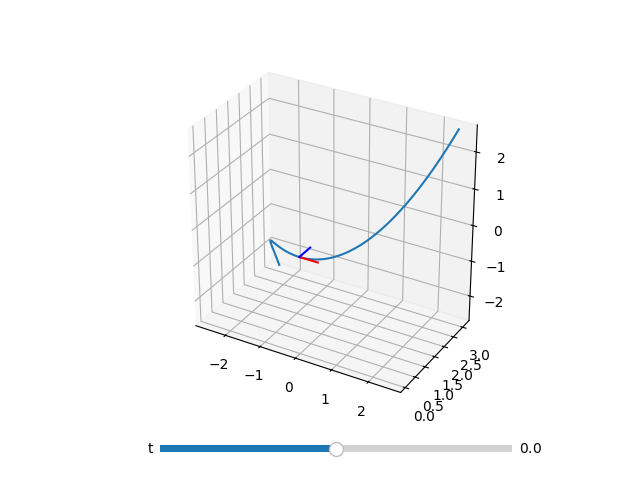

In [14]:
tp = np.linspace(-2.5, 2.5, 101)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xf(tp), yf(tp), zf(tp))
ax.set_aspect('equal')

fig.subplots_adjust(bottom=0.15)
axt = fig.add_axes([0.25, 0.05, 0.55, 0.03])

t0 = 0
pl1, = ax.plot([xf(t0), xf(t0)+vx(t0)/2], [yf(t0), yf(t0)+vy(t0)/2], [zf(t0), zf(t0)+vz(t0)/2], color='r')
pl2, = ax.plot([xf(t0), xf(t0)+ux(t0)/2], [yf(t0), yf(t0)+uy(t0)/2], [zf(t0), zf(t0)+uz(t0)/2], color='b')

t_slider = Slider(
    ax=axt,
    label='t',
    valmin=-2.5,
    valmax=2.5,
    valinit=t0,
)

def update(val):
    pl1.set_data_3d([xf(val), xf(val)+vx(val)/2], [yf(val), yf(val)+vy(val)/2], [zf(val), zf(val)+vz(val)/2])
    pl2.set_data_3d([xf(val), xf(val)+ux(val)/2], [yf(val), yf(val)+uy(val)/2], [zf(val), zf(val)+uz(val)/2])
    fig.canvas.draw_idle()

t_slider.on_changed(update)

In [15]:
alx = sym.lambdify(t, a.subs(paras).components[N.i], 'numpy')
aly = sym.lambdify(t, a.subs(paras).components[N.j], 'numpy')
alz = sym.lambdify(t, a.subs(paras).components[N.k], 'numpy')

btx = sym.lambdify(t, b.subs(paras).components[N.i], 'numpy')
bty = sym.lambdify(t, b.subs(paras).components[N.j], 'numpy')
btz = sym.lambdify(t, b.subs(paras).components[N.k], 'numpy')

gmx = sym.lambdify(t, c.subs(paras).components[N.i], 'numpy')
gmy = sym.lambdify(t, c.subs(paras).components[N.j], 'numpy')
gmz = sym.lambdify(t, c.subs(paras).components[N.k], 'numpy')

0

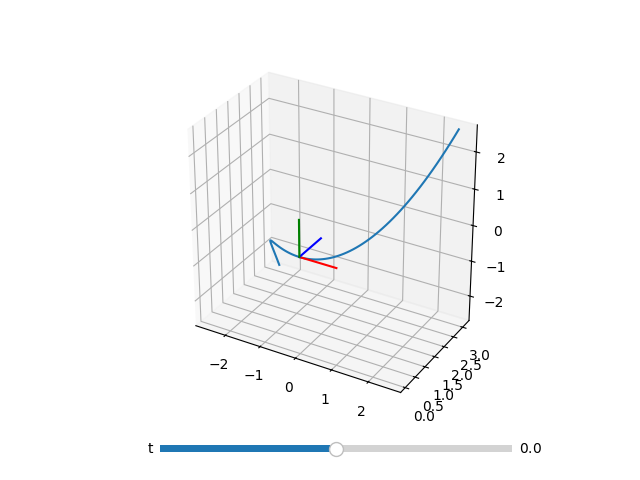

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xf(tp), yf(tp), zf(tp))
ax.set_aspect('equal')

fig.subplots_adjust(bottom=0.15)
axt = fig.add_axes([0.25, 0.05, 0.55, 0.03])

val = 0
pl1, = ax.plot([xf(val), xf(val)+alx(val)], [yf(val), yf(val)+aly(val)], [zf(val), zf(val)+alz(val)], color='r')
pl2, = ax.plot([xf(val), xf(val)+btx(val)], [yf(val), yf(val)+bty(val)], [zf(val), zf(val)+btz(val)], color='b')
pl3, = ax.plot([xf(val), xf(val)+gmx(val)], [yf(val), yf(val)+gmy(val)], [zf(val), zf(val)+gmz(val)], color='g')

t_slider = Slider(
    ax=axt,
    label='t',
    valmin=-2.5,
    valmax=2.5,
    valinit=val,
)

def update(val):
    pl1.set_data_3d([xf(val), xf(val)+alx(val)], [yf(val), yf(val)+aly(val)], [zf(val), zf(val)+alz(val)])
    pl2.set_data_3d([xf(val), xf(val)+btx(val)], [yf(val), yf(val)+bty(val)], [zf(val), zf(val)+btz(val)])
    pl3.set_data_3d([xf(val), xf(val)+gmx(val)], [yf(val), yf(val)+gmy(val)], [zf(val), zf(val)+gmz(val)])
    fig.canvas.draw_idle()

t_slider.on_changed(update)

In [17]:
from matplotlib import cbook

l1f = sym.lambdify(t, l1.subs(paras), 'numpy')
l1x = sym.lambdify(t, l1b.subs(paras).components[N.i], 'numpy')
l1y = sym.lambdify(t, l1b.subs(paras).components[N.j], 'numpy')
l1z = sym.lambdify(t, l1b.subs(paras).components[N.k], 'numpy')

l3f = sym.lambdify(t, l3.subs(paras), 'numpy')
l3x = sym.lambdify(t, l3r.subs(paras).components[N.i], 'numpy')
l3y = sym.lambdify(t, l3r.subs(paras).components[N.j], 'numpy')
l3z = sym.lambdify(t, l3r.subs(paras).components[N.k], 'numpy')

theta = np.linspace(0, 2*np.pi, 50).reshape([-1, 1])
phi = np.linspace(-np.pi, np.pi, 50)

def calc_circle(val):
    r = np.array([xf(val), yf(val), zf(val)])
    a = np.array([alx(val), aly(val), alz(val)])
    b = np.array([btx(val), bty(val), btz(val)])

    radius = l1f(val)
    center = r + radius*b
    circle = center + radius*a*np.cos(theta) + radius*b*np.sin(theta)

    return r, center, circle

def calc_sphere(val):
    r = np.array([xf(val), yf(val), zf(val)])
    rc = np.array([l3x(val), l3y(val), l3z(val)])

    radius = l3f(val)
    center = r + rc
    u, v = np.meshgrid(theta, phi)
    x = center[0] + radius * np.cos(u) * np.sin(v)
    y = center[1] + radius * np.sin(u) * np.sin(v)
    z = center[2] + radius * np.cos(v)

    return center, (x, y, z)

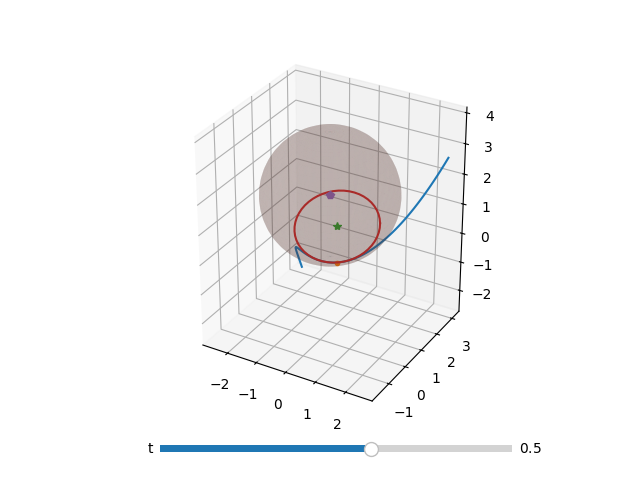

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xf(tp), yf(tp), zf(tp))

fig.subplots_adjust(bottom=0.15)
axt = fig.add_axes([0.25, 0.05, 0.55, 0.03])

val = 0.5
xt, ctrp, circ = calc_circle(val)
pt, = ax.plot([xt[0]], [xt[1]], [xt[2]], '.')
pc, = ax.plot([ctrp[0]], [ctrp[1]], [ctrp[2]], '*')
lc, = ax.plot(circ[:,0], circ[:,1], circ[:,2])

ctrs, sph = calc_sphere(val)
ps, = ax.plot([ctrs[0]], [ctrs[1]], [ctrs[2]], 'p')
ss = ax.plot_surface(*sph, alpha=0.1)

t_slider = Slider(
    ax=axt,
    label='t',
    valmin=-2.5,
    valmax=2.5,
    valinit=val,
)

def update(val):
    xt, ctrp, circ = calc_circle(val)
    pt.set_data_3d([xt[0]], [xt[1]], [xt[2]])
    pc.set_data_3d([ctrp[0]], [ctrp[1]], [ctrp[2]])
    lc.set_data_3d(circ[:,0], circ[:,1], circ[:,2])

    ctrs, sph = calc_sphere(val)
    ps.set_data_3d([ctrs[0]], [ctrs[1]], [ctrs[2]])
    ss.set_verts(np.stack(
                [cbook._array_patch_perimeters(a, 1, 1)
                 for a in sph],
                axis=-1))
    fig.canvas.draw_idle()

t_slider.on_changed(update)
ax.set_aspect('equal')